# Accidental Drug Related Deaths

This is an analysis of Accidental Drug Related Deaths in the US between the years 2012-2018

__Data set from:__ https://catalog.data.gov/dataset/accidental-drug-related-deaths-january-2012-sept-2015

The analysis explores the following questions:

### *Primary Question:*
1. What is the most significant factor determining accidental drug-related death?

### *Secondary Questions:*
1. Which drug or combinations of drugs were most lethal?
2. How significant is ‘Age’ as an explanatory variable?
3. How significant is ‘Race’ as an explanatory variable?
4. Place of death (Residence vs. Other) significant?
5. Optional variable we could analyze: Description of Injury (Drug Use, Ingestion, Injection, etc)

In [2]:
#Imports - Numpy, Pandas, MatPlotLib, Seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Show plots magic function
%matplotlib inline

## EDA

In [14]:
#Get the file and assign it to add_df (stands for Accidental Drug Deaths DataFrame)
add_df = pd.read_csv('../data/raw/Accidental_Drug_Related_Deaths_2012-2018.csv')
#add_df = pd.read_csv('Accidental_Drug_Related_Deaths_2012-2018.csv')

#Check the info and data
add_df.info()
add_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 41 columns):
ID                     5105 non-null object
Date                   5103 non-null object
DateType               5103 non-null object
Age                    5102 non-null float64
Sex                    5099 non-null object
Race                   5092 non-null object
ResidenceCity          4932 non-null object
ResidenceCounty        4308 non-null object
ResidenceState         3556 non-null object
DeathCity              5100 non-null object
DeathCounty            4005 non-null object
Location               5081 non-null object
LocationifOther        590 non-null object
DescriptionofInjury    4325 non-null object
InjuryPlace            5039 non-null object
InjuryCity             3349 non-null object
InjuryCounty           2364 non-null object
InjuryState            1424 non-null object
COD                    5105 non-null object
OtherSignifican        169 non-null object
Heroin        

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,InjuryCityGeo,ResidenceCityGeo
0,12-0001,01/01/2012 12:00:00 AM,DateofDeath,35.0,Male,White,HEBRON,TOLLAND,NaN,HEBRON,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"HEBRON, CT\n(41.658069, -72.366324)",NaN,"HEBRON\n(43.694742, -71.808963)"
1,12-0002,01/03/2012 12:00:00 AM,DateofDeath,41.0,Male,White,BRISTOL,HARTFORD,NaN,BRISTOL,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Bristol, CT\n(41.673037, -72.945791)",NaN,"BRISTOL\n(41.673037, -72.945791)"
2,12-0003,01/04/2012 12:00:00 AM,DateofDeath,61.0,Male,Black,DANBURY,FAIRFIELD,NaN,DANBURY,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Danbury, CT\n(41.393666, -73.451539)",NaN,"DANBURY\n(41.393666, -73.451539)"
3,12-0004,01/05/2012 12:00:00 AM,DateofDeath,51.0,Male,White,STRATFORD,FAIRFIELD,NaN,BRIDGEPORT,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"BRIDGEPORT, CT\n(41.179195, -73.189476)",NaN,"STRATFORD\n(41.200888, -73.131323)"
4,12-0005,01/07/2012 12:00:00 AM,DateofDeath,45.0,Male,White,HARTFORD,HARTFORD,NaN,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"HARTFORD, CT\n(41.765775, -72.673356)",NaN,"HARTFORD\n(41.765775, -72.673356)"


In [15]:
#Check missing data
add_df.isnull().sum()

ID                        0
Date                      2
DateType                  2
Age                       3
Sex                       6
Race                     13
ResidenceCity           173
ResidenceCounty         797
ResidenceState         1549
DeathCity                 5
DeathCounty            1100
Location                 24
LocationifOther        4515
DescriptionofInjury     780
InjuryPlace              66
InjuryCity             1756
InjuryCounty           2741
InjuryState            3681
COD                       0
OtherSignifican        4936
Heroin                 2576
Cocaine                3584
Fentanyl               2873
FentanylAnalogue       4716
Oxycodone              4498
Oxymorphone            4997
Ethanol                3858
Hydrocodone            4987
Benzodiazepine         3762
Methadone              4631
Amphet                 4946
Tramad                 4975
Morphine_NotHeroin     5063
Hydromorphone          5080
Other                  4670
OpiateNOS           

In [16]:
#Splitting DeathCityGeo and ResidenceCityGeo into Coordinates(long/lat) and Cities
add_df[['DeathCityCounty', 'DeathCoordinates']] = add_df['DeathCityGeo'].str.split('\n', expand = True)
add_df[['DeathCityExtracted', 'DeathCountyExtracted']] = add_df['DeathCityCounty'].str.split(',', expand = True)
add_df[['ResidenceCityExtracted', 'ResidenceCoordinates']] =add_df['ResidenceCityGeo'].str.split('\n', expand = True)

In [17]:
#Dropping all the columns we're not involved in the analysis
add_df.drop(['ID', 'DateType', 'MannerofDeath', 'ResidenceCounty', 'ResidenceState', 'DeathCounty', 'InjuryPlace', 
               'InjuryCity', 'InjuryCounty', 'InjuryState', 'OtherSignifican', 'InjuryCityGeo', 'COD', 'DeathCountyExtracted', 
               'DeathCityCounty', 'DeathCityGeo', 'ResidenceCityGeo'], axis=1, inplace = True)
add_df.head()

,Date,Age,Sex,Race,ResidenceCity,DeathCity,Location,LocationifOther,DescriptionofInjury,Heroin,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,DeathCoordinates,DeathCityExtracted,ResidenceCityExtracted,ResidenceCoordinates
0,01/01/2012 12:00:00 AM,35.0,Male,White,HEBRON,HEBRON,Residence,NaN,Drug Use,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.658069, -72.366324)",HEBRON,HEBRON,"(43.694742, -71.808963)"
1,01/03/2012 12:00:00 AM,41.0,Male,White,BRISTOL,BRISTOL,Hospital,NaN,Ingestion,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.673037, -72.945791)",Bristol,BRISTOL,"(41.673037, -72.945791)"
2,01/04/2012 12:00:00 AM,61.0,Male,Black,DANBURY,DANBURY,Hospital,NaN,Used Cocaine,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.393666, -73.451539)",Danbury,DANBURY,"(41.393666, -73.451539)"
3,01/05/2012 12:00:00 AM,51.0,Male,White,STRATFORD,BRIDGEPORT,Other,Mother's Home,Ingestion,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.179195, -73.189476)",BRIDGEPORT,STRATFORD,"(41.200888, -73.131323)"
4,01/07/2012 12:00:00 AM,45.0,Male,White,HARTFORD,HARTFORD,Residence,NaN,Used Heroin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.765775, -72.673356)",HARTFORD,HARTFORD,"(41.765775, -72.673356)"


In [18]:
#Dropping rows with irreplaceable null values
add_df.dropna(subset=['Date', 'Age', 'Sex', 'Race'], inplace=True)
add_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5088 entries, 0 to 5104
Data columns (total 30 columns):
Date                      5088 non-null object
Age                       5088 non-null float64
Sex                       5088 non-null object
Race                      5088 non-null object
ResidenceCity             4921 non-null object
DeathCity                 5087 non-null object
Location                  5068 non-null object
LocationifOther           588 non-null object
DescriptionofInjury       4311 non-null object
Heroin                    2525 non-null object
Cocaine                   1514 non-null object
Fentanyl                  2225 non-null object
FentanylAnalogue          388 non-null object
Oxycodone                 605 non-null object
Oxymorphone               107 non-null object
Ethanol                   1242 non-null object
Hydrocodone               116 non-null object
Benzodiazepine            1338 non-null object
Methadone                 472 non-null object
Amphe

In [19]:
#Make all string values uppercase
add_df = add_df.apply(lambda x: x.astype(str).str.upper())

In [20]:
#Locating the NaN value in the DeathCity
DeathCityMissingloc = np.where(add_df['DeathCity'].isna())
DeathCityMissingloc

(array([], dtype=int64),)

In [21]:
#Filling the NaN value of the DeathCity and overview of the cleaning process
add_df['DeathCity'].fillna(add_df['DeathCityExtracted'], inplace = True)
add_df.info()
add_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5088 entries, 0 to 5104
Data columns (total 30 columns):
Date                      5088 non-null object
Age                       5088 non-null object
Sex                       5088 non-null object
Race                      5088 non-null object
ResidenceCity             5088 non-null object
DeathCity                 5088 non-null object
Location                  5088 non-null object
LocationifOther           5088 non-null object
DescriptionofInjury       5088 non-null object
Heroin                    5088 non-null object
Cocaine                   5088 non-null object
Fentanyl                  5088 non-null object
FentanylAnalogue          5088 non-null object
Oxycodone                 5088 non-null object
Oxymorphone               5088 non-null object
Ethanol                   5088 non-null object
Hydrocodone               5088 non-null object
Benzodiazepine            5088 non-null object
Methadone                 5088 non-null object


,Date,Age,Sex,Race,ResidenceCity,DeathCity,Location,LocationifOther,DescriptionofInjury,Heroin,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,DeathCoordinates,DeathCityExtracted,ResidenceCityExtracted,ResidenceCoordinates
0,01/01/2012 12:00:00 AM,35.0,MALE,WHITE,HEBRON,HEBRON,RESIDENCE,NAN,DRUG USE,Y,...,NAN,NAN,NAN,NAN,NAN,NAN,"(41.658069, -72.366324)",HEBRON,HEBRON,"(43.694742, -71.808963)"
1,01/03/2012 12:00:00 AM,41.0,MALE,WHITE,BRISTOL,BRISTOL,HOSPITAL,NAN,INGESTION,Y,...,NAN,NAN,NAN,NAN,NAN,NAN,"(41.673037, -72.945791)",BRISTOL,BRISTOL,"(41.673037, -72.945791)"
2,01/04/2012 12:00:00 AM,61.0,MALE,BLACK,DANBURY,DANBURY,HOSPITAL,NAN,USED COCAINE,NAN,...,NAN,NAN,NAN,NAN,NAN,NAN,"(41.393666, -73.451539)",DANBURY,DANBURY,"(41.393666, -73.451539)"
3,01/05/2012 12:00:00 AM,51.0,MALE,WHITE,STRATFORD,BRIDGEPORT,OTHER,MOTHER'S HOME,INGESTION,NAN,...,NAN,NAN,NAN,NAN,NAN,NAN,"(41.179195, -73.189476)",BRIDGEPORT,STRATFORD,"(41.200888, -73.131323)"
4,01/07/2012 12:00:00 AM,45.0,MALE,WHITE,HARTFORD,HARTFORD,RESIDENCE,NAN,USED HEROIN,Y,...,NAN,NAN,NAN,NAN,NAN,NAN,"(41.765775, -72.673356)",HARTFORD,HARTFORD,"(41.765775, -72.673356)"
5,01/08/2012 12:00:00 AM,51.0,MALE,WHITE,WATERBURY,WATERBURY,RESIDENCE,FRIEND'S HOUSE,INGESTION,NAN,...,NAN,NAN,NAN,NAN,NAN,NAN,"(41.554261, -73.043069)",WATERBURY,WATERBURY,"(41.554261, -73.043069)"
6,01/08/2012 12:00:00 AM,24.0,FEMALE,WHITE,STAMFORD,STAMFORD,HOSPITAL,NAN,INGESTION,NAN,...,NAN,NAN,NAN,NAN,NAN,NAN,"(41.051924, -73.539475)",STAMFORD,STAMFORD,"(41.051924, -73.539475)"
7,01/08/2012 12:00:00 AM,33.0,MALE,WHITE,BROOKLYN,PUTNAM,HOSPITAL,NAN,INJECTION,Y,...,NAN,NAN,NAN,NAN,NAN,NAN,"(41.914993, -71.911904)",PUTNAM,BROOKLYN,"(40.692529, -73.990996)"
8,01/11/2012 12:00:00 AM,54.0,MALE,WHITE,DEEP RIVER,DEEP RIVER,RESIDENCE,NAN,INGESTION,NAN,...,NAN,NAN,NAN,NAN,NAN,NAN,"(41.385619, -72.435658)",DEEP RIVER,DEEP RIVER,"(41.385619, -72.435658)"
9,01/12/2012 12:00:00 AM,46.0,MALE,WHITE,SOUTHINGTON,SOUTHINGTON,HOSPITAL,NAN,INGESTION,NAN,...,NAN,NAN,NAN,BATH SALT,NAN,NAN,"(41.600428, -72.878105)",SOUTHINGTON,SOUTHINGTON,"(41.600428, -72.878105)"


In [24]:
#Use regex to pull out key phrases that are repead
add_df['cleaned_location'] = add_df.LocationifOther.str.extract('\s(HOME|HOUSE|RESIDENCE|MOTEL|HOTEL|INN|SHELTER|LODGE|YMCA|COTTAGE|8|CASINO|SUITES)')

#map the key phrases to more singular locations
place={'HOME':'FRIEND OR FAMILY HOME','HOUSE':'FRIEND OR FAMILY HOME','RESIDENCE':'FRIEND OR FAMILY HOME','8':'HOTEL','LODGE':'HOTEL','INN':'HOTEL','HOTEL':'HOTEL','MOTEL':'HOTEL','CASINO':'HOTEL','COTTAGE':'FRIEND OR FAMILY HOME'}
add_df['cleaned_location'] = add_df['cleaned_location'].map(place)

#Fill the new location field with the original Location field where there are NAs
add_df.cleaned_location = add_df.cleaned_location.fillna(add_df.Location)

#map the key phrases from the location column to more singular locations
place={'RESIDENCE':"RESIDENCE",'HOSPITAL':'SUPERVISED CARE','FRIEND OR FAMILY HOME':'FRIEND OR FAMILY HOME','OTHER':"OTHER",'HOTEL':'HOTEL','NAN':"OTHER",'CONVALESCENT HOME':'SUPERVISED CARE','HOSPICE':'SUPERVISED CARE','NURSING HOME':'SUPERVISED CARE'}
add_df['cleaned_location'] = add_df['cleaned_location'].map(place)

print(add_df.groupby(['cleaned_location'])['cleaned_location'].count())

cleaned_location
FRIEND OR FAMILY HOME     257
HOTEL                      98
OTHER                     454
RESIDENCE                2654
SUPERVISED CARE          1625
Name: cleaned_location, dtype: int64


## Which drug or combinations of drugs were most lethal?

Although the COD column explains the use of drugs, it is too verbose and is difficult to group similar values. We will create a new column 'drugs_involved' and poupulate it with the drugs marked 'Y' (suggesting involvement) separated by commas. We also have to arrange these in an alphabetical manner so it will make it easy to group them.

In [302]:
#Get Column names
add_df.columns

Index(['Date', 'Age', 'Sex', 'Race', 'ResidenceCity', 'DeathCity', 'Location',
       'DescriptionofInjury', 'Heroin', 'Cocaine', 'Fentanyl',
       'FentanylAnalogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad',
       'Morphine_NotHeroin', 'Hydromorphone', 'Other', 'OpiateNOS',
       'AnyOpioid', 'DeathCoordinates', 'DeathCityExtracted',
       'ResidenceCityExtracted', 'ResidenceCoordinates'],
      dtype='object')

In [303]:
#Replace the indicator 'Y' with the name of the column in uppercase (in this case, the name of the drug).
#If null, don't change the value
def assignDrugName(value, column):
    if(pd.isnull(value)):
        return value
    else:
        return str(column).upper()

# Loop through the drugs columns. Don't change anything in the 'Other' column since it already has the name.
for column in add_df.loc[:, 'Heroin':'AnyOpioid']:
    if(column != 'Other'):
        add_df[column] = add_df[column].map(lambda value: assignDrugName(value, column))

add_df.loc[:, 'Heroin':'AnyOpioid'].head()

,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid
0,HEROIN,COCAINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HEROIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BENZODIAZEPINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,COCAINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,METHADONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HEROIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [304]:
#Create a new column and append the values in the drug columns to track multiple-use
add_df['drugs_used'] = add_df.loc[:, 'Heroin':'AnyOpioid'].apply(lambda value: ', '.join(value[value.notnull()]), axis = 1)
add_df['drugs_used'].value_counts()

HEROIN                                                                              340
COCAINE                                                                             214
HEROIN, ANYOPIOID                                                                   209
FENTANYL, ANYOPIOID                                                                 200
HEROIN, FENTANYL, ANYOPIOID                                                         162
HEROIN, COCAINE                                                                     144
FENTANYL                                                                            106
HEROIN, FENTANYL                                                                    101
COCAINE, FENTANYL, ANYOPIOID                                                         99
HEROIN, ETHANOL                                                                      96
HEROIN, COCAINE, ANYOPIOID                                                           86
HEROIN, COCAINE, FENTANYL, ANYOP

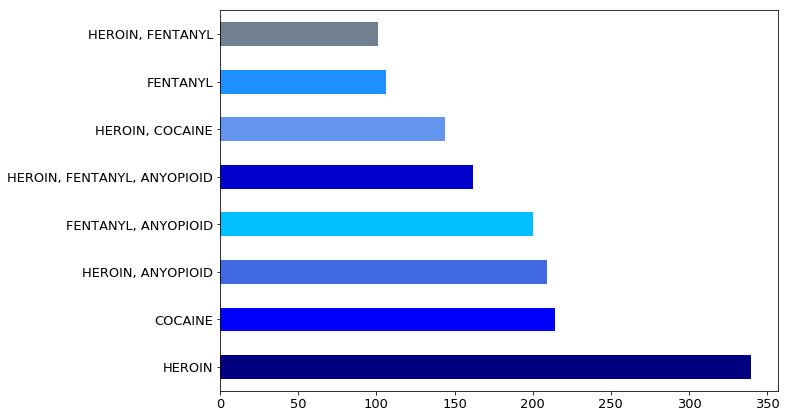

In [305]:
prob = add_df['drugs_used'].value_counts()
prob
prob = prob.loc[prob > 100]
prob.plot(kind='barh', figsize=(10,7), color=['navy', 'blue', 'royalblue', 'deepskyblue', 'mediumblue', 'cornflowerblue', 'dodgerblue', 'slategray'], fontsize=13);
plt.show()